y=ax2 + bx +c
non linear regression
used in senarios like spread of disease, population growth 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("Salaries.csv")
df

,Position,Level,Salaries
0,Associate Software Engineer,1,45000
1,Software Engineer,2,50000
2,Software Engineer 1,3,60000
3,Software Engineer 2,4,80000
4,Senior Software Engineer,5,100000
5,Product Manager,6,125000
6,Consultant Manager,7,150000
7,Principal Manager,8,200000
8,CTO,9,250000
9,CEO,10,300000


In [5]:
# to predict the 11 th level (executive director) salary
# as salaries is only dependent on the level not on the position name here dependent variable is salary and independent is level
df.isnull().sum()

Position    0
Level       0
Salaries    0
dtype: int64

In [27]:
x=df[["Level"]]
print(type(x))

<class 'pandas.core.frame.DataFrame'>


In [28]:
x #input

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [29]:
y=df.iloc[:,2]
y # output

0     45000
1     50000
2     60000
3     80000
4    100000
5    125000
6    150000
7    200000
8    250000
9    300000
Name: Salaries, dtype: int64

Text(0.5, 1.0, 'Level vs Salary')

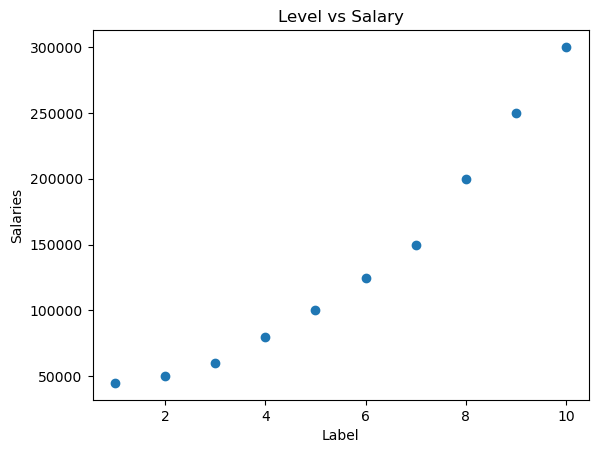

In [30]:
plt.scatter(x,y)
plt.xlabel("Label")
plt.ylabel("Salaries")
plt.title("Level vs Salary")

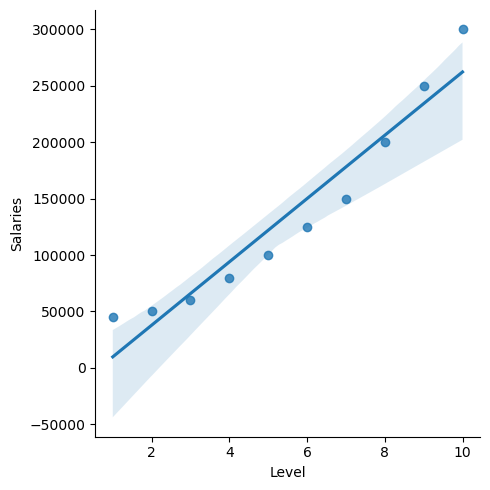

In [31]:
sns.lmplot(x="Level",y="Salaries",data=df)

In [32]:
from sklearn.linear_model import LinearRegression
linearmodel=LinearRegression()
linearmodel.fit(x,y)

LinearRegression()

In [33]:
linearmodel.predict([[11]]) #using linear Regression

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([290333.33333333])

In [34]:
from sklearn.preprocessing import PolynomialFeatures
polynomialModel=PolynomialFeatures(degree=2)

In [38]:
x_poly=polynomialModel.fit_transform(x)
x_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [40]:
# to predict level 11 the input should be also in the form of degree 2
needed_level=11
testoutput=polynomialModel.fit_transform([[needed_level]])
testoutput

array([[  1.,  11., 121.]])

In [39]:
y

0     45000
1     50000
2     60000
3     80000
4    100000
5    125000
6    150000
7    200000
8    250000
9    300000
Name: Salaries, dtype: int64

In [37]:
model2=LinearRegression()
model2.fit(x_poly,y) # polynomial regression fitting 

LinearRegression()

In [43]:
model2.predict(testoutput) # prediction from degree two linear regression

array([358666.66666667])

Text(0.5, 1.0, 'Using Linear Regression')

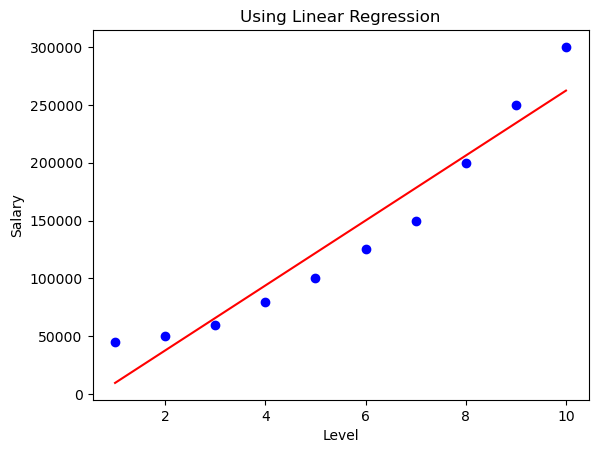

In [47]:
plt.scatter(x,y,color="blue")
plt.plot(x,linearmodel.predict(x),color="red")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Using Linear Regression")

Text(0.5, 1.0, 'Using polynomial Regression')

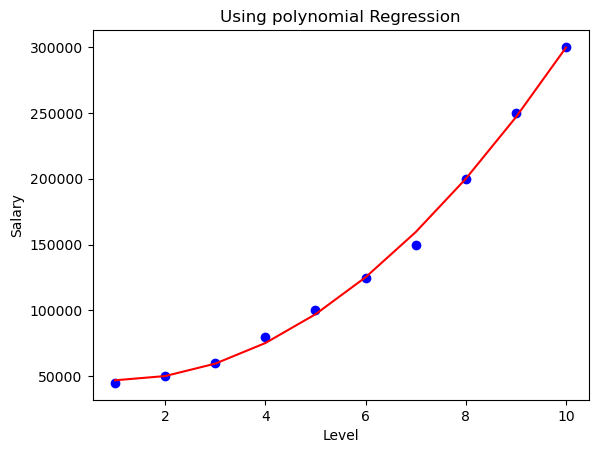

In [51]:
plt.scatter(x,y,color="blue")
plt.plot(x,model2.predict(polynomialModel.fit_transform(x)),color="red")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Using polynomial Regression")